In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path_to_csv = "kdd.txt"

df = pd.read_csv(path_to_csv, header = None)

# 1. Clean data with Panda

In [3]:
df.rename(columns={0: 'duration', 
                   1: 'protocol_type',
                   2: 'service', 
                   3: 'flag',
                   4: 'src_bytes',
                   5: 'dst_bytes',
                   6: 'land',
                   7: 'wrong_fragment',
                   8: 'urgent',
                   9: 'hot',
                   10: 'num_failed_logins',
                   11: 'logged_in',
                   12: 'num_compromised',
                   13: 'root_shell',
                   14: 'su_attempted',
                   15: 'num_root',
                   16: 'num_file_creations',
                   17: 'num_shells',
                   18: 'num_access_files',
                   19: 'num_outbound_cmds',
                   20: 'is_host_login',
                   21: 'is_guest_login',
                   22: 'count',
                   23: 'srv_count',
                   24: 'serror_rate',
                   25: 'srv_serror_rate',
                   26: 'rerror_rate',
                   27: 'srv_rerror_rate',
                   28: 'same_srv_rate',
                   29: 'diff_srv_rate',
                   30: 'srv_diff_host_rate',
                   31: 'dst_host_count',
                   32: 'dst_host_srv_count',
                   33: 'dst_host_same_srv_rate',
                   34: 'dst_host_diff_srv_rate',
                   35: 'dst_host_same_src_port_rate',
                   36: 'dst_host_srv_diff_host_rate',
                   37: 'dst_host_serror_rate',
                   38: 'dst_host_srv_serror_rate',
                   39: 'dst_host_rerror_rate',
                   40: 'dst_host_srv_rerror_rate',
                   41: 'type'
                  }, inplace=True)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
group_by = df.groupby(['type']).size().reset_index(name='counts')

In [6]:
n_groups = df['type'].nunique()

In [7]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# 2. Visualize data with Matplotlib

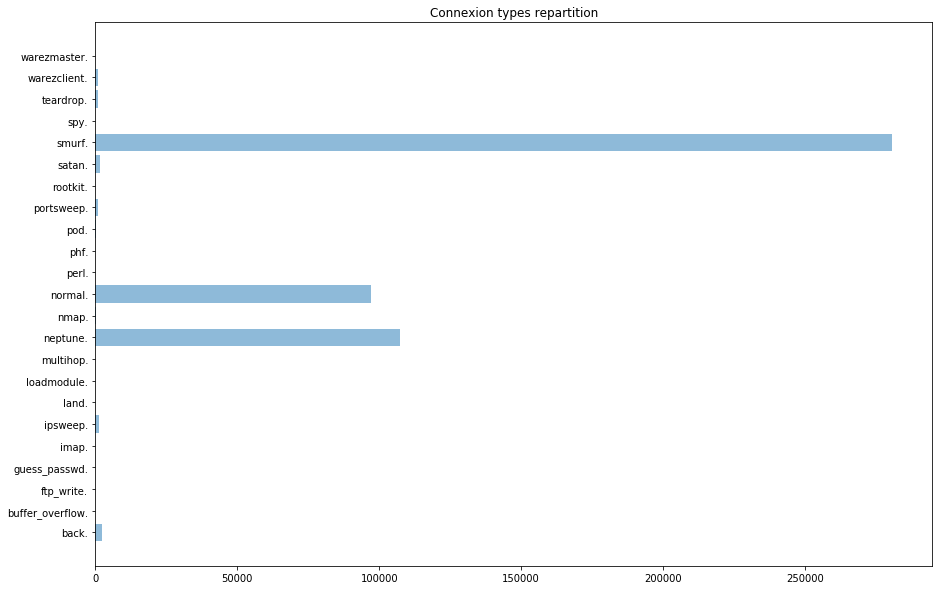

In [8]:
types = group_by['type']
count_by_type = group_by['counts']

y_pos = np.arange(len(types))

plt.figure(figsize=(15,10))
    
plt.barh(y_pos, count_by_type, align='center', alpha=0.5)
plt.yticks(y_pos, types)
plt.title('Connexion types repartition')
 
plt.show()

# 3. Modelisation

Verification qu'il n'y a aucune valeur null ou na

In [9]:
NULL = df.isnull().sum()
NA = df.isna().sum()
NA_NULL = pd.DataFrame([NA, NULL]).T
NA_NULL.columns = ["nb_NA", "nb_NULL"]
NA_NULL

,nb_NA,nb_NULL
duration,0,0
protocol_type,0,0
service,0,0
flag,0,0
src_bytes,0,0
dst_bytes,0,0
land,0,0
wrong_fragment,0,0
urgent,0,0
hot,0,0


Pas de data préparation

In [10]:
#Ce avec quoi on va predire
X = df.loc[:, df.columns != "type"]
X = X.drop("protocol_type", 1)
X = X.drop("service", 1)
X = X.drop("flag", 1)
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [11]:
#Ce que l'on veut predire
Y = df["type"]
Y.head()

0    normal.
1    normal.
2    normal.
3    normal.
4    normal.
Name: type, dtype: object

In [12]:
#Séparation en jeu de test et de train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [13]:
#Séparation en jeu de test et de validation 
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.3)

In [14]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
hyperparametres = {"n_estimators" : 20, 
                  "bootstrap" : False}
#On fait un dictionnaire avec les hypers paramètres

In [16]:
algo = RandomForestClassifier(**hyperparametres)

In [17]:
#Entrainement du modèle
modele = algo.fit(X_train, Y_train)

In [18]:
 modele.score(X_test, Y_test)

0.9997590222085133

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
algo2 = GaussianNB()

In [21]:
modele2 = algo2.fit(X_train, Y_train)

In [22]:
modele2.score(X_test, Y_test)

0.9358227945712523

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
algo3 = DecisionTreeClassifier()

In [25]:
modele3 = algo3.fit(X_train, Y_train)

In [26]:
modele3.score(X_test, Y_test)

0.9994505706354102

In [27]:
ques = X_val.values
rep = Y_val.values

In [28]:
ques

array([[0.000e+00, 5.200e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.032e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.032e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 5.200e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.032e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [29]:
q = modele.predict(ques)

In [30]:
modele.score(X_val, Y_val)

0.9995951690169355

# La GridSearch 

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

In [32]:
clf = RandomForestClassifier(n_jobs = -1)

param_grid = {
    "min_samples_split": [3, 5], #10
    "n_estimators": [40, 50], #56
    "max_depth": [3, 5, 10], #12
    "max_features": [3, 18], #10
    "criterion": ["gini", "entropy"]    
}

scorers = {
    "precision_score": make_scorer(precision_score), 
    "recall_score":make_scorer(recall_score),
    "accuracy_score":make_scorer(accuracy_score)
}

skf = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(clf, 
                           param_grid, 
                           scoring = scorers, 
                           refit="precision_score", 
                           cv=skf, 
                           return_train_score=True, 
                           n_jobs=-1)

grid_search.fit(X_train.values, Y_train.values)
y_pred = grid_search.predict(X_test.values)
#print('Best params for {}'.format(refit_score))
print(grid_search.best_params_)

results = pd.DataFrame()
print(results)
print(grid_search.best_score_)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Elodie\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Elodie\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000022774FA65D0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Elodie\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\E...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000022774FA65D0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Elodie\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\E...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\Elodie\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\Elodie\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...02277AC68378>))>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\Elodie\Anaconda3\lib\asyncio\events.py in _run(self=<Handle IOLoop._run_callback(functools.par...02277AC68378>))>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x000002277AC68378>),)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x000002277AC68378>))
    753         """Runs a callback with error handling.
    754 
    755         For use in subclasses.
    756         """
    757         try:
--> 758             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x000002277AC68378>)
    759             if ret is not None:
    760                 from tornado import gen
    761                 # Functions that return Futures typically swallow all
    762                 # exceptions and store them in the Future.  If a Future

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 14, 18, 15, 32, 293767, tzinfo=tzutc()), 'msg_id': 'dc8d3dc6b85b41ac81c2e00c42c09325', 'msg_type': 'execute_request', 'session': 'e3ae67ae3f6c4c998f86e086435a0a1e', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'dc8d3dc6b85b41ac81c2e00c42c09325', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'e3ae67ae3f6c4c998f86e086435a0a1e']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 14, 18, 15, 32, 293767, tzinfo=tzutc()), 'msg_id': 'dc8d3dc6b85b41ac81c2e00c42c09325', 'msg_type': 'execute_request', 'session': 'e3ae67ae3f6c4c998f86e086435a0a1e', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'dc8d3dc6b85b41ac81c2e00c42c09325', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'e3ae67ae3f6c4c998f86e086435a0a1e'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 14, 18, 15, 32, 293767, tzinfo=tzutc()), 'msg_id': 'dc8d3dc6b85b41ac81c2e00c42c09325', 'msg_type': 'execute_request', 'session': 'e3ae67ae3f6c4c998f86e086435a0a1e', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'dc8d3dc6b85b41ac81c2e00c42c09325', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='clf = RandomForestClassifier(n_jobs = -1)\n\nparam...e()\nprint(results)\nprint(grid_search.best_score_)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-32-8a48ecab90fd>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 22711fd90f0, executio...rue silent=False shell_futures=True> result=None>)
   2896             raise ValueError("Interactivity was %r" % interactivity)
   2897         try:
   2898             for i, node in enumerate(to_run_exec):
   2899                 mod = ast.Module([node])
   2900                 code = compiler(mod, cell_name, "exec")
-> 2901                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000022711EE7930, file "<ipython-input-32-8a48ecab90fd>", line 27>
        result = <ExecutionResult object at 22711fd90f0, executio...rue silent=False shell_futures=True> result=None>
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000022711EE7930, file "<ipython-input-32-8a48ecab90fd>", line 27>, result=<ExecutionResult object at 22711fd90f0, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000022711EE7930, file "<ipython-input-32-8a48ecab90fd>", line 27>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import matplotlib.pyplot as plt\nimport numpy as ...m sklearn.model_selection import train_test_split', 'path_to_csv = "kdd.txt"\n\ndf = pd.read_csv(path_to_csv, header = None)', "df.rename(columns={0: 'duration', \n             ...    41: 'type'\n                  }, inplace=True)", 'df.head()', "group_by = df.groupby(['type']).size().reset_index(name='counts')", "n_groups = df['type'].nunique()", 'df.dtypes', "types = group_by['type']\ncount_by_type = group_b...title('Connexion types repartition')\n \nplt.show()", 'NULL = df.isnull().sum()\nNA = df.isna().sum()\nNA....T\nNA_NULL.columns = ["nb_NA", "nb_NULL"]\nNA_NULL', '#Ce avec quoi on va predire\nX = df.loc[:, df.col...drop("service", 1)\nX = X.drop("flag", 1)\nX.head()', '#Ce que l\'on veut predire\nY = df["type"]\nY.head()', '#Séparation en jeu de test et de train \nX_train,... Y_test = train_test_split(X, Y, test_size = 0.3)', '#Séparation en jeu de test et de validation \nX_t...train_test_split(X_test, Y_test, test_size = 0.3)', 'from sklearn.ensemble import RandomForestClassifier', 'hyperparametres = {"n_estimators" : 20, \n       ...n fait un dictionnaire avec les hypers paramètres', 'algo = RandomForestClassifier(**hyperparametres)', '#Entrainement du modèle\nmodele = algo.fit(X_train, Y_train)', 'modele.score(X_test, Y_test)', 'from sklearn.naive_bayes import GaussianNB', ...], 'NA': duration                       0
protocol_type  ...  0
type                           0
dtype: int64, 'NA_NULL':                              nb_NA  nb_NULL
dura...    0
type                             0        0, 'NULL': duration                       0
protocol_type  ...  0
type                           0
dtype: int64, 'Out': {4:    duration protocol_type service flag  src_byte...            0.0  normal.  

[5 rows x 42 columns], 7: duration                         int64
protocol_...e                            object
dtype: object, 9:                              nb_NA  nb_NULL
dura...    0
type                             0        0, 10:    duration  src_bytes  dst_bytes  land  wrong_f...                     0.0  

[5 rows x 38 columns], 11: 0    normal.
1    normal.
2    normal.
3    normal.
4    normal.
Name: type, dtype: object, 18: 0.9997590222085133, 22: 0.9358227945712523, 26: 0.9994505706354102, 28: array([[0.000e+00, 5.200e+02, 0.000e+00, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), 30: 0.9995951690169355}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import matplotlib.pyplot as plt\nimport numpy as ...m sklearn.model_selection import train_test_split', 'path_to_csv = "kdd.txt"\n\ndf = pd.read_csv(path_to_csv, header = None)', "df.rename(columns={0: 'duration', \n             ...    41: 'type'\n                  }, inplace=True)", 'df.head()', "group_by = df.groupby(['type']).size().reset_index(name='counts')", "n_groups = df['type'].nunique()", 'df.dtypes', "types = group_by['type']\ncount_by_type = group_b...title('Connexion types repartition')\n \nplt.show()", 'NULL = df.isnull().sum()\nNA = df.isna().sum()\nNA....T\nNA_NULL.columns = ["nb_NA", "nb_NULL"]\nNA_NULL', '#Ce avec quoi on va predire\nX = df.loc[:, df.col...drop("service", 1)\nX = X.drop("flag", 1)\nX.head()', '#Ce que l\'on veut predire\nY = df["type"]\nY.head()', '#Séparation en jeu de test et de train \nX_train,... Y_test = train_test_split(X, Y, test_size = 0.3)', '#Séparation en jeu de test et de validation \nX_t...train_test_split(X_test, Y_test, test_size = 0.3)', 'from sklearn.ensemble import RandomForestClassifier', 'hyperparametres = {"n_estimators" : 20, \n       ...n fait un dictionnaire avec les hypers paramètres', 'algo = RandomForestClassifier(**hyperparametres)', '#Entrainement du modèle\nmodele = algo.fit(X_train, Y_train)', 'modele.score(X_test, Y_test)', 'from sklearn.naive_bayes import GaussianNB', ...], 'NA': duration                       0
protocol_type  ...  0
type                           0
dtype: int64, 'NA_NULL':                              nb_NA  nb_NULL
dura...    0
type                             0        0, 'NULL': duration                       0
protocol_type  ...  0
type                           0
dtype: int64, 'Out': {4:    duration protocol_type service flag  src_byte...            0.0  normal.  

[5 rows x 42 columns], 7: duration                         int64
protocol_...e                            object
dtype: object, 9:                              nb_NA  nb_NULL
dura...    0
type                             0        0, 10:    duration  src_bytes  dst_bytes  land  wrong_f...                     0.0  

[5 rows x 38 columns], 11: 0    normal.
1    normal.
2    normal.
3    normal.
4    normal.
Name: type, dtype: object, 18: 0.9997590222085133, 22: 0.9358227945712523, 26: 0.9994505706354102, 28: array([[0.000e+00, 5.200e+02, 0.000e+00, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), 30: 0.9995951690169355}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\Elodie\Documents\A5\Python\data-science-esilv\<ipython-input-32-8a48ecab90fd> in <module>()
     22                            refit="precision_score", 
     23                            cv=skf, 
     24                            return_train_score=True, 
     25                            n_jobs=-1)
     26 
---> 27 grid_search.fit(X_train.values, Y_train.values)
     28 y_pred = grid_search.predict(X_test.values)
     29 #print('Best params for {}'.format(refit_score))
     30 print(grid_search.best_params_)
     31 

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=StratifiedKFold(n_splits=2, rand...: make_scorer(accuracy_score)},
       verbose=0), X=array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), y=array(['neptune.', 'smurf.', 'neptune.', ..., 'smurf.', 'smurf.',
       'smurf.'], dtype=object), groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=2, random_state=None, shuffle=False)>
        X = array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]])
        y = array(['neptune.', 'smurf.', 'neptune.', ..., 'smurf.', 'smurf.',
       'smurf.'], dtype=object)
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Feb 14 19:16:33 2019
PID: 9328                Python 3.7.0: C:\Users\Elodie\Anaconda3\python.exe
...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 0.000e+00, 0.000e+00,
         0.000e+00]]), array(['neptune.', 'smurf.', 'neptune.', ..., 'smurf.', 'smurf.',
       'smurf.'], dtype=object), {'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}, array([ 99455, 108460, 119985, ..., 345811, 345812, 345813]), array([     0,      1,      2, ..., 186649, 192118, 192341]), 0, {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 40}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 0.000e+00, 0.000e+00,
         0.000e+00]]), array(['neptune.', 'smurf.', 'neptune.', ..., 'smurf.', 'smurf.',
       'smurf.'], dtype=object), {'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}, array([ 99455, 108460, 119985, ..., 345811, 345812, 345813]), array([     0,      1,      2, ..., 186649, 192118, 192341]), 0, {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 40})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 0.000e+00, 0.000e+00,
         0.000e+00]]), y=array(['neptune.', 'smurf.', 'neptune.', ..., 'smurf.', 'smurf.',
       'smurf.'], dtype=object), scorer={'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}, train=array([ 99455, 108460, 119985, ..., 345811, 345812, 345813]), test=array([     0,      1,      2, ..., 186649, 192118, 192341]), verbose=0, parameters={'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 40}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X_test = memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 7.000e-02, 9.300e-01,
         9.300e-01]])
        y_test = array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object)
        scorer = {'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X_test=memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 7.000e-02, 9.300e-01,
         9.300e-01]]), y_test=array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object), scorer={'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X_test = memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 7.000e-02, 9.300e-01,
         9.300e-01]])
        y_test = array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object)
        scorer = {'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _multimetric_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X_test=memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 7.000e-02, 9.300e-01,
         9.300e-01]]), y_test=array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object), scorers={'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(precision_score)
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X_test = memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 7.000e-02, 9.300e-01,
         9.300e-01]])
        y_test = array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object)
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py in __call__(self=make_scorer(precision_score), estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=memmap([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1... ..., 7.000e-02, 9.300e-01,
         9.300e-01]]), y_true=array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object), sample_weight=None)
    103             return self._sign * self._score_func(y_true, y_pred,
    104                                                  sample_weight=sample_weight,
    105                                                  **self._kwargs)
    106         else:
    107             return self._sign * self._score_func(y_true, y_pred,
--> 108                                                  **self._kwargs)
        self._kwargs = {}
    109 
    110 
    111 class _ProbaScorer(_BaseScorer):
    112     def __call__(self, clf, X, y, sample_weight=None):

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py in precision_score(y_true=array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object), y_pred=array(['neptune.', 'smurf.', 'neptune.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object), labels=None, pos_label=1, average='binary', sample_weight=None)
   1256     p, _, _, _ = precision_recall_fscore_support(y_true, y_pred,
   1257                                                  labels=labels,
   1258                                                  pos_label=pos_label,
   1259                                                  average=average,
   1260                                                  warn_for=('precision',),
-> 1261                                                  sample_weight=sample_weight)
        sample_weight = None
   1262     return p
   1263 
   1264 
   1265 def recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary',

...........................................................................
C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py in precision_recall_fscore_support(y_true=array(['neptune.', 'smurf.', 'neptune.', ..., 'g..., 'land.',
       'guess_passwd.'], dtype=object), y_pred=array(['neptune.', 'smurf.', 'neptune.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object), beta=1.0, labels=None, pos_label=1, average='binary', warn_for=('precision',), sample_weight=None)
   1035                     raise ValueError("pos_label=%r is not a valid label: %r" %
   1036                                      (pos_label, present_labels))
   1037             labels = [pos_label]
   1038         else:
   1039             raise ValueError("Target is %s but average='binary'. Please "
-> 1040                              "choose another average setting." % y_type)
        y_type = 'multiclass'
   1041     elif pos_label not in (None, 1):
   1042         warnings.warn("Note that pos_label (set to %r) is ignored when "
   1043                       "average != 'binary' (got %r). You may use "
   1044                       "labels=[pos_label] to specify a single positive class."

ValueError: Target is multiclass but average='binary'. Please choose another average setting.
___________________________________________________________________________

# Courbe ROC

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [88]:
import scikitplot as skplt
import matplotlib.pyplot as plt
def courbe_ROC(df, algo, y):
    X_ = df.loc[:, df.columns != y]
    Y_ = df[y]
    X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_, Y_, test_size = 0.3)
    modele = algo.fit(X_train_, Y_train_)
    probs = modele.predict_proba(X_test_)
    preds = probs[:,1]

    y_true = Y_test_
    y_probas = modele.predict_proba(X_test_)
    
    skplt.metrics.plot_roc_curve(y_true, y_probas)
    plt.show()

C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


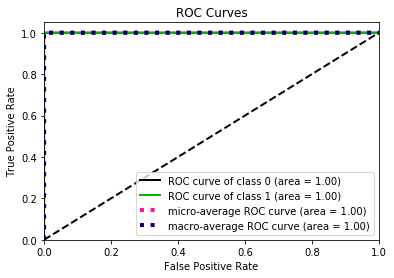

In [93]:
df_normal = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['normal.'])], axis = 1)
courbe_ROC(df_normal, algo, 'normal.')

C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


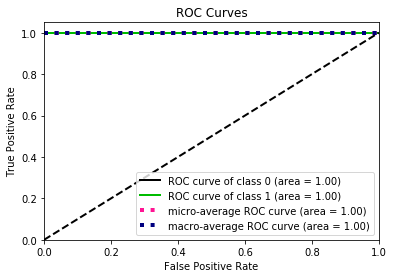

In [90]:
df_smurf = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['smurf.'])], axis = 1)
courbe_ROC(df_smurf, algo, 'smurf.')

C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


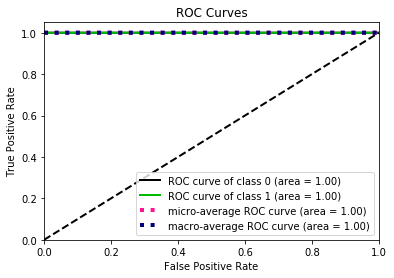

In [91]:
df_neptune = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['neptune.'])], axis = 1)
courbe_ROC(df_neptune, algo, 'neptune.')

C:\Users\Elodie\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


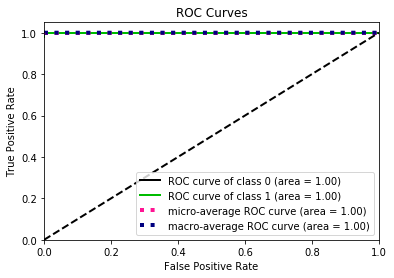

In [92]:
df_back = pd.concat([X, pd.DataFrame(pd.get_dummies(df['type'])['back.'])], axis = 1)
courbe_ROC(df_back, algo, 'back.')